# Shap Values: Machine Learning Example

### Importing Packages

In [1]:
import shap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### Function to Evaluate Models with SHAP

In [2]:
def evaluate_models_shap(models, X, y):
    # splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    
    # empty list to store results
    results = {}
    
    # evaluating shap values in models
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    
        # Use TreeExplainer for tree-based model
        if name == 'Random Forest':
            explainer = shap.TreeExplainer(model)
        # Use generic explainer for other models
        else:
            explainer = shap.Explainer(model, X_train)
            
        shap_values = explainer(X_test)
        results[name] = {'accuracy': accuracy, 'shap_values': shap_values}
        
    return results, X_test

### Evaluating Models

In [3]:
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
X, y = iris.data, iris.target

# defining models
models = [
    ("Random Forest", RandomForestClassifier(random_state=0)),
    ("Logistic Regression", LogisticRegression(random_state=0))
]

# evaluate models
results, X_test = evaluate_models_shap(models, X, y)

### Interpreting the Results

Model: Random Forest, Accuracy: 0.9


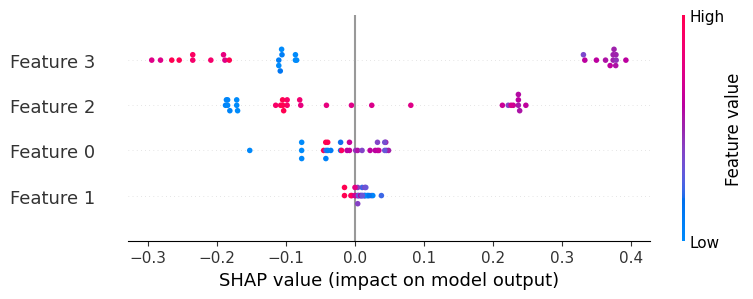

Model: Logistic Regression, Accuracy: 0.97


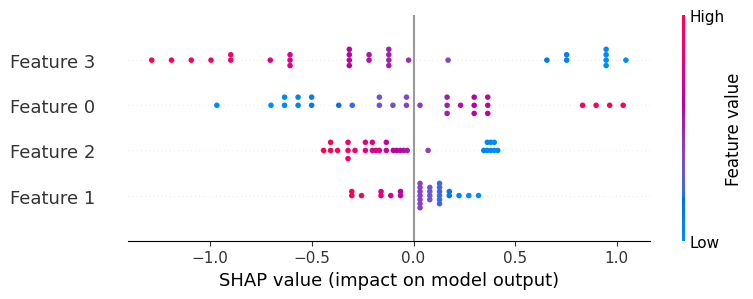

In [4]:
for name, result in results.items():
    print(f"Model: {name}, Accuracy: {round(result['accuracy'], 2)}")
    
    # Select SHAP values for Class 1
    shap_values_class_1 = result['shap_values'][:, :, 1]
    
    shap.summary_plot(shap_values_class_1, X_test)